In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [3]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
# 데이터 불러오기
time = pd.read_excel('./data/전직종_연도별_근로시간.xlsx')
time

,한국표준직업분류6차,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,전직종,194.8,192.8,189.3,182.3,176.3,175.9,184.2,182.0,180.8,167.5,163.6,176.7,177.5
1,관리자(1),183.0,180.4,176.7,168.1,165.4,166.8,179.4,175.3,174.4,161.8,159.2,176.9,178.1
2,전문가 및 관련 종사자(2),183.6,181.1,177.7,171.2,164.5,164.3,176.7,174.0,172.9,160.3,158.0,175.0,174.1
3,사무 종사자(3),185.5,183.2,180.4,172.9,166.0,167.4,180.5,176.7,175.7,162.2,160.0,177.2,178.0
4,서비스 종사자(4),203.3,201.0,180.7,178.7,176.7,171.1,171.9,166.6,168.7,157.5,155.7,149.8,148.0
5,판매 종사자(5),189.9,187.2,183.1,177.4,171.7,173.3,182.6,178.4,176.6,162.7,159.7,174.1,172.9
6,농림어업 숙련 종사자(6),200.2,189.5,189.3,184.1,182.6,190.1,194.0,194.4,193.6,178.5,172.9,183.0,181.2
7,기능원 및 관련 기능 종사자(7),203.6,202.0,198.1,191.9,186.6,187.1,194.4,191.4,189.8,176.4,171.1,186.0,186.2
8,"장치,기계조작 및 조립종사자(8)",212.4,214.3,211.2,204.4,198.3,198.0,199.1,200.5,199.6,185.6,178.2,187.6,191.9
9,단순노무 종사자(9),214.4,209.4,202.0,193.8,188.9,187.7,188.4,190.5,187.0,174.8,167.2,173.6,177.4


In [5]:
# 데이터 정제(불필요 문자열 제거)
time['한국표준직업분류6차'] = time['한국표준직업분류6차'].str.split('(',expand=True)[0]

In [6]:
# 데이터 정제(행,열 변환 및 인덱스 재정의)
time = time.T
time = time.reset_index()

In [7]:
# 데이터 정제(컬럼명 재정의 및 필요 행 추출)
time.columns = time.iloc[0]
time = time.iloc[2:].reset_index(drop=True)

In [8]:
# 데이터 정제(컬럼명 변경)
time.rename(columns={'한국표준직업분류6차' : '연도'},inplace=True)

In [9]:
# 데이터 전처리(결측치, 이상치 확인)
time.info()
time.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   연도               12 non-null     object
 1   전직종              12 non-null     object
 2   관리자              12 non-null     object
 3   전문가 및 관련 종사자     12 non-null     object
 4   사무 종사자           12 non-null     object
 5   서비스 종사자          12 non-null     object
 6   판매 종사자           12 non-null     object
 7   농림어업 숙련 종사자      12 non-null     object
 8   기능원 및 관련 기능 종사자  12 non-null     object
 9   장치,기계조작 및 조립종사자  12 non-null     object
 10  단순노무 종사자         12 non-null     object
dtypes: object(11)
memory usage: 1.2+ KB


,연도,전직종,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,"장치,기계조작 및 조립종사자",단순노무 종사자
count,12,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
unique,12,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
top,2010,192.8,180.4,181.1,183.2,201.0,187.2,189.5,202.0,214.3,209.4
freq,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
# 데이터 전처리(중복치 확인)
time[time.duplicated()]

,연도,전직종,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,"장치,기계조작 및 조립종사자",단순노무 종사자


In [11]:
# 최종 데이터 확인
time

,연도,전직종,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,"장치,기계조작 및 조립종사자",단순노무 종사자
0,2010,192.8,180.4,181.1,183.2,201.0,187.2,189.5,202.0,214.3,209.4
1,2011,189.3,176.7,177.7,180.4,180.7,183.1,189.3,198.1,211.2,202.0
2,2012,182.3,168.1,171.2,172.9,178.7,177.4,184.1,191.9,204.4,193.8
3,2013,176.3,165.4,164.5,166.0,176.7,171.7,182.6,186.6,198.3,188.9
4,2014,175.9,166.8,164.3,167.4,171.1,173.3,190.1,187.1,198.0,187.7
5,2015,184.2,179.4,176.7,180.5,171.9,182.6,194.0,194.4,199.1,188.4
6,2016,182.0,175.3,174.0,176.7,166.6,178.4,194.4,191.4,200.5,190.5
7,2017,180.8,174.4,172.9,175.7,168.7,176.6,193.6,189.8,199.6,187.0
8,2018,167.5,161.8,160.3,162.2,157.5,162.7,178.5,176.4,185.6,174.8
9,2019,163.6,159.2,158.0,160.0,155.7,159.7,172.9,171.1,178.2,167.2


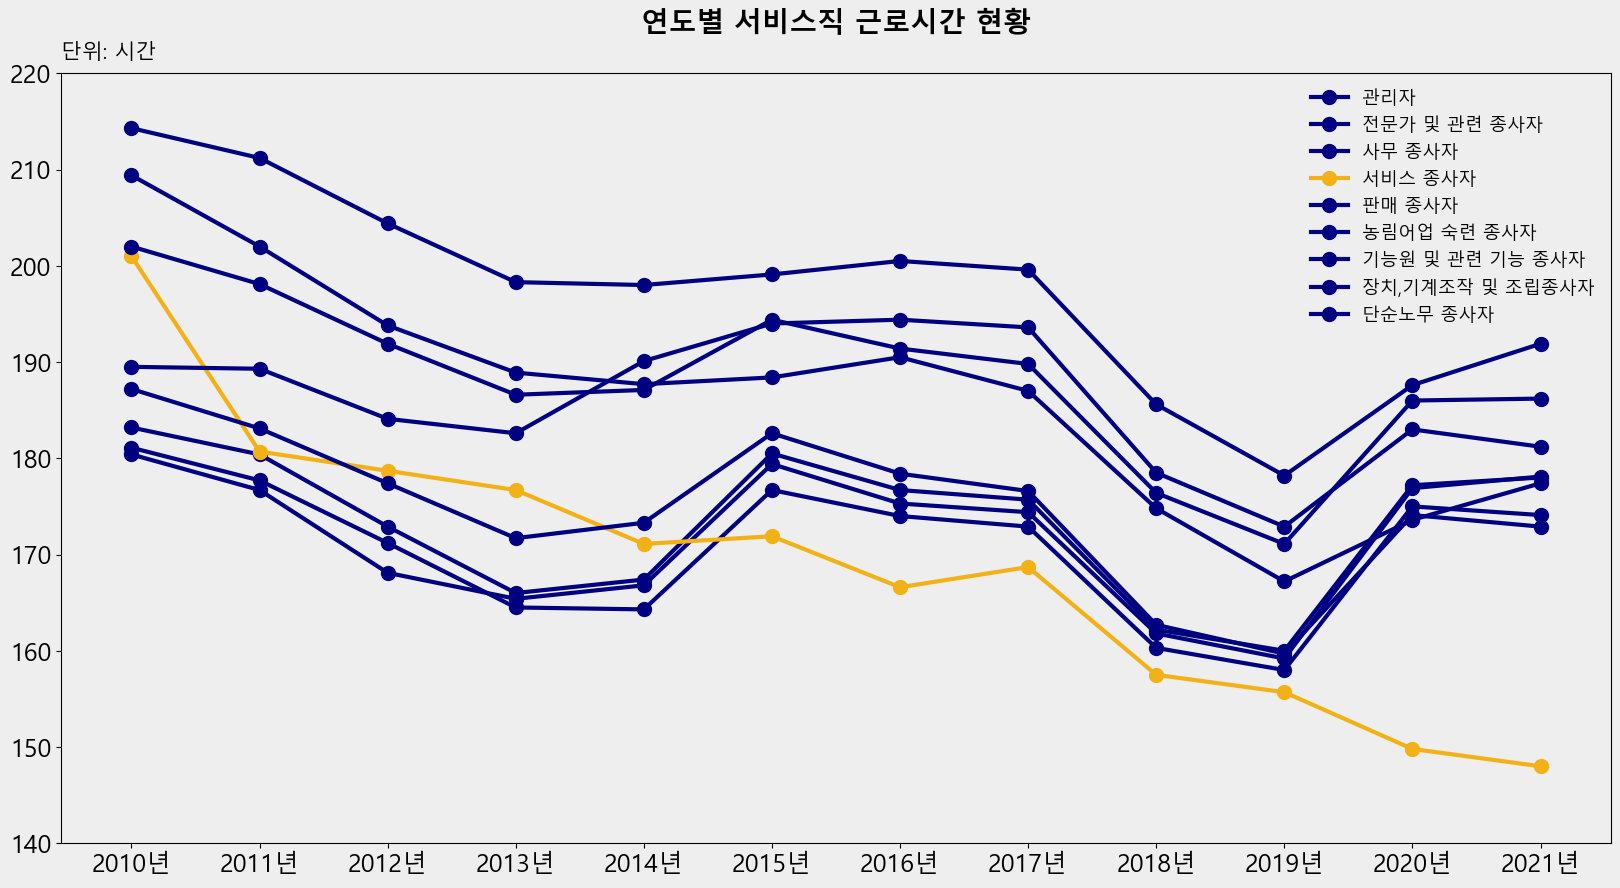

In [16]:
# 정제된 데이터 시각화(연도 및 직종별 월 근로시간 현황)
color1 = ['navy','navy','navy','#F2B117','navy','navy','navy','navy','navy','navy']
color2 = ['#F2B117','#F2B117','#F2B117','#F2B117','navy','#F2B117','#F2B117','#F2B117','#F2B117','#F2B117']
xlist = np.arange(0,12,1)
ylist = np.arange(140,230,10)

fig = plt.figure(figsize=(20,10))

plt.title('연도별 서비스직 근로시간 현황', fontsize = 20,loc='center', pad=30, fontweight="bold")

fig.set_facecolor('#EEEEEE')
plt.gca().set_facecolor('#EEEEEE')
plt.rc('font', family = 'Malgun Gothic', size = 18)

for i in range(len(time.columns[2:])):
    plt.plot(time['연도'],time[time.columns[i+2]],color=color1[i], marker='o', ms= 10)

plt.xticks(xlist,time['연도']+'년')   
plt.yticks(ylist)
    
plt.rcParams['lines.linewidth'] = 3

plt.text(-0.55,221.5, '단위: 시간', fontsize=15, color = 'black')   


plt.legend(time.columns[2:], fontsize=13,loc ='upper right', frameon=False)
plt.show()

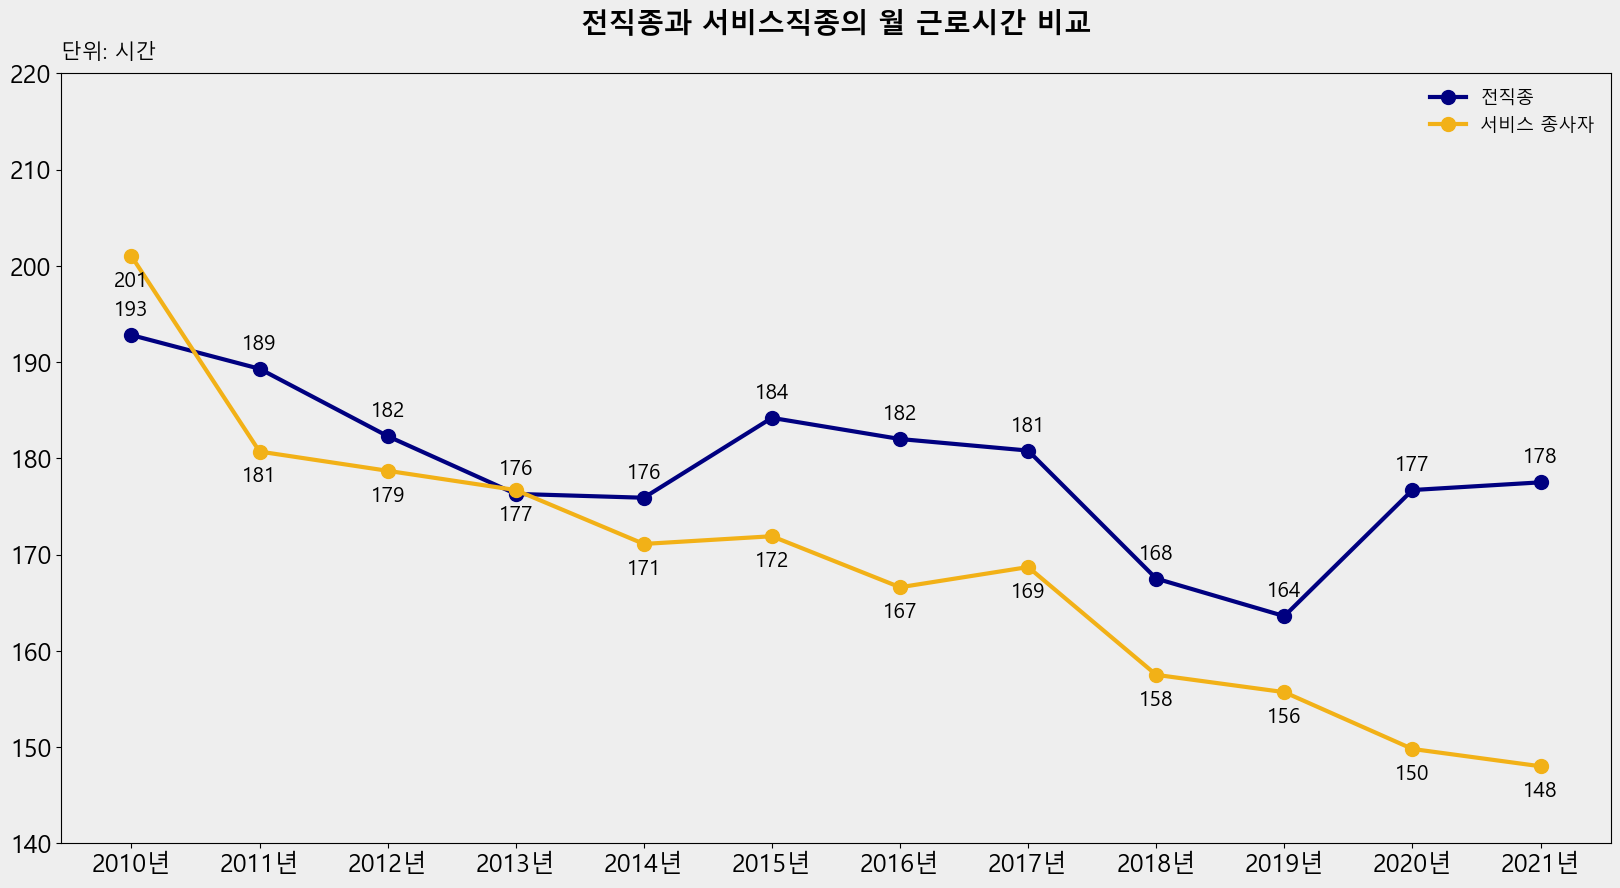

In [15]:
# 정제된 데이터 시각화(전직종과 서비스직종의 월 근로시간 비교)

color1 = ['navy','navy','navy','#F2B117','navy','navy','navy','navy','navy','navy']
color2 = ['#F2B117','#F2B117','#F2B117','#F2B117','navy','#F2B117','#F2B117','#F2B117','#F2B117','#F2B117']
xlist = np.arange(0,12,1)
ylist = np.arange(140,230,10)

fig = plt.figure(figsize=(20,10))

plt.title('전직종과 서비스직종의 월 근로시간 비교', fontsize = 20,loc='center', pad=30, fontweight="bold")

fig.set_facecolor('#EEEEEE')
plt.gca().set_facecolor('#EEEEEE')
plt.rc('font', family = 'Malgun Gothic', size = 18)


plt.plot(time['연도'],time['전직종'], marker='o', ms= 10, color='navy')
plt.plot(time['연도'],time['서비스 종사자'], marker='o', ms= 10, color='#F2B117')

plt.xticks(xlist,time['연도']+'년')   
plt.yticks(ylist)
    
plt.rcParams['lines.linewidth'] = 3

plt.text(-0.55,221.5, '단위: 시간', fontsize=15, color = 'black')   

#그래프 상단에 값 추가하기
for i in range(len(time['연도'])):
    height = time['서비스 종사자'][i:i+1]
    plt.text(time['연도'][i:i+1], height - 1.5, '%.0f' %height, ha='center', va='top', 
             size = 15, color='black')
    
for i in range(len(time['연도'])):
    height = time['전직종'][i:i+1]
    plt.text(time['연도'][i:i+1], height + 1.5, '%.0f' %height, ha='center', va='bottom', 
             size = 15, color='black')

plt.legend(['전직종','서비스 종사자'],fontsize=13,loc ='upper right', frameon=False)
plt.show()